#### Mall Customer Segmentation Data

 #### Link : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


#### Problem Statement:

#### Our goal is to understand our customers better, so that we can identify the target customers who are most likely to converge. This will help us provide valuable insights to our marketing team and plan our strategy accordingly.
#### Features in the Dataset

####    CustomerID : Unique ID assigned to the customer
####    Gender : Gender of the customer
####    Age : Age of the customer
####    Annual Income (k$) :Annual Income of the customer
#### Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature



### Importing Libraries

In [2]:
import numpy as np
from numpy import unique
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift

### Reading Data

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Scatterplot of the input data

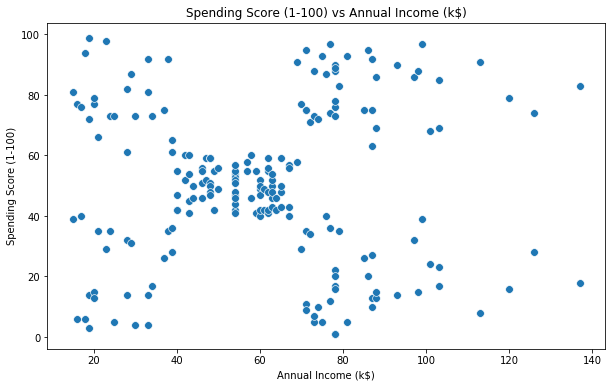

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = data ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#### Gender analysis

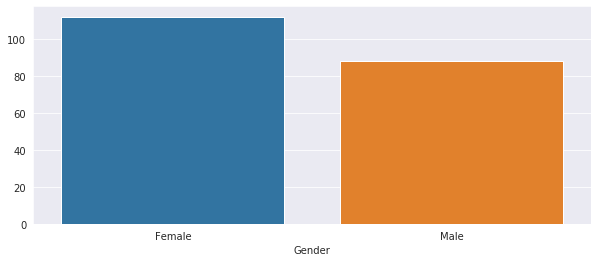

In [5]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Handling Categorical Data

In [4]:
df=pd.get_dummies(data['Gender'], dtype=int)
df

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


### Drop Female column

In [5]:
a=df.drop("Female",axis=1)
a

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


### join

In [6]:
x = pd.concat([data, a], axis = 1)
x

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


### Drop Unwanted coloumns

In [7]:
x.drop(['CustomerID','Gender'],inplace =True, axis=1)
x

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


### Clustering using Meanshift

In [164]:
model = MeanShift(bandwidth=25)

In [165]:
model.fit(x)

MeanShift(bandwidth=25)

In [166]:
pred = model.fit_predict(x)
cluster =unique(pred)
print("Clusters are : ",cluster)

Clusters are :  [0 1 2 3 4]


In [167]:
label = model.labels_
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [168]:
centroid = model.cluster_centers_
centroid

array([[37.68181818, 54.98484848, 49.3030303 ,  0.36363636],
       [32.57142857, 82.25714286, 82.17142857,  0.45714286],
       [44.55555556, 83.88888889, 17.62962963,  0.55555556],
       [24.72      , 29.76      , 73.68      ,  0.48      ],
       [47.63157895, 27.31578947, 19.        ,  0.42105263]])

In [169]:
centroid[:,1]

array([54.98484848, 82.25714286, 83.88888889, 29.76      , 27.31578947])

In [170]:
print(x.columns)


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Male'], dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

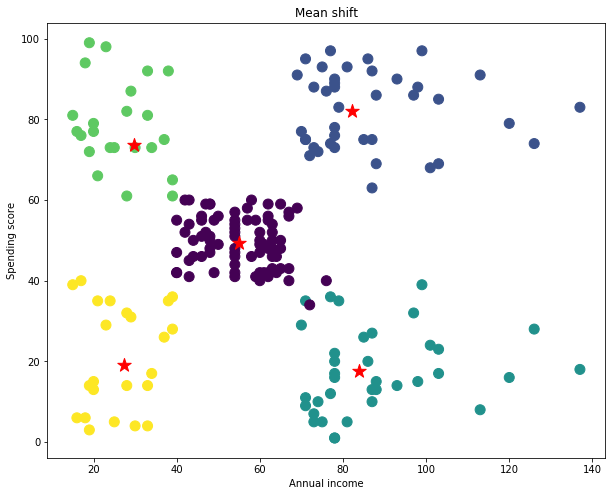

In [178]:
plt.figure(figsize=(10,8))

plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=label,s=100)

plt.scatter(centroid[:,1],centroid[:,2], color='red', marker='*', s=200)

plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Mean shift')
plt.show

### Evaluation

In [175]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x,label)
print("score:", score)

score: 0.44306411424781494
